In [1]:
 import pandas as pd
 import matplotlib.pyplot as plt
 import numpy as np
 import matplotlib.dates as mdates
 import datetime as dt
 from tensorflow.keras.layers import Dense, Dropout
 from keras.layers import GRU
 from keras.models import Sequential, load_model
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import MinMaxScaler

In [2]:
 import pandas as pdcsv
 df = pd.read_csv("/content/TITAN.csv")

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TITAN,EQ,144.95,146.0,156.45,146.0,155.00,155.70,154.36,23000,3.550370e+11,NaN,NaN,NaN
1,2000-01-04,TITAN,EQ,155.70,152.0,152.00,144.0,148.05,147.40,146.72,26300,3.858700e+11,NaN,NaN,NaN
2,2000-01-05,TITAN,EQ,147.40,144.0,148.80,136.0,139.95,138.40,142.95,20600,2.944850e+11,NaN,NaN,NaN
3,2000-01-06,TITAN,EQ,138.40,142.0,149.50,141.0,149.50,149.50,147.87,31600,4.672750e+11,NaN,NaN,NaN
4,2000-01-07,TITAN,EQ,149.50,149.5,153.00,145.0,147.75,146.35,148.63,36600,5.439965e+11,NaN,NaN,NaN


In [4]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,TITAN,EQ,1461.45,1470.0,1489.75,1465.15,1478.95,1479.85,1479.58,1020499,1.509913e+14,39416.0,228386.0,0.2238
5302,2021-04-27,TITAN,EQ,1479.85,1485.0,1503.55,1482.00,1498.00,1495.10,1494.21,1145908,1.712228e+14,42363.0,298862.0,0.2608
5303,2021-04-28,TITAN,EQ,1495.10,1505.0,1514.90,1491.70,1509.00,1508.85,1504.73,1037771,1.561564e+14,37985.0,212098.0,0.2044
5304,2021-04-29,TITAN,EQ,1508.85,1524.0,1527.50,1497.00,1504.35,1506.80,1510.30,1927546,2.911181e+14,63568.0,492144.0,0.2553
5305,2021-04-30,TITAN,EQ,1506.80,1500.0,1516.55,1471.00,1489.85,1491.65,1493.26,3691399,5.512201e+14,111986.0,699586.0,0.1895


In [6]:
#selecting only column of interest
Date_column = 'Date'
open_column = 'Open'
high_column = 'High'
Low_column = 'Low'
close_column = 'Close'
volume_column = 'Volume'

In [7]:
 main_df = df[[Date_column, open_column, high_column,Low_column,close_column,volume_column]]
 print(main_df)

            Date    Open     High      Low    Close   Volume
0     2000-01-03   146.0   156.45   146.00   155.70    23000
1     2000-01-04   152.0   152.00   144.00   147.40    26300
2     2000-01-05   144.0   148.80   136.00   138.40    20600
3     2000-01-06   142.0   149.50   141.00   149.50    31600
4     2000-01-07   149.5   153.00   145.00   146.35    36600
...          ...     ...      ...      ...      ...      ...
5301  2021-04-26  1470.0  1489.75  1465.15  1479.85  1020499
5302  2021-04-27  1485.0  1503.55  1482.00  1495.10  1145908
5303  2021-04-28  1505.0  1514.90  1491.70  1508.85  1037771
5304  2021-04-29  1524.0  1527.50  1497.00  1506.80  1927546
5305  2021-04-30  1500.0  1516.55  1471.00  1491.65  3691399

[5306 rows x 6 columns]


In [9]:
main_df.loc[:, 'Open'] = main_df['Open'].astype(int)
main_df.loc[:, 'High'] = main_df['High'].astype(int)
main_df.loc[:, 'Low'] = main_df['Low'].astype(int)
main_df.loc[:, 'Close'] = main_df['Close'].astype(int)

In [10]:
main_df

,Date,Open,High,Low,Close,Volume
0,2000-01-03,146.0,156.0,146.0,155.0,23000
1,2000-01-04,152.0,152.0,144.0,147.0,26300
2,2000-01-05,144.0,148.0,136.0,138.0,20600
3,2000-01-06,142.0,149.0,141.0,149.0,31600
4,2000-01-07,149.0,153.0,145.0,146.0,36600
...,...,...,...,...,...,...
5301,2021-04-26,1470.0,1489.0,1465.0,1479.0,1020499
5302,2021-04-27,1485.0,1503.0,1482.0,1495.0,1145908
5303,2021-04-28,1505.0,1514.0,1491.0,1508.0,1037771
5304,2021-04-29,1524.0,1527.0,1497.0,1506.0,1927546


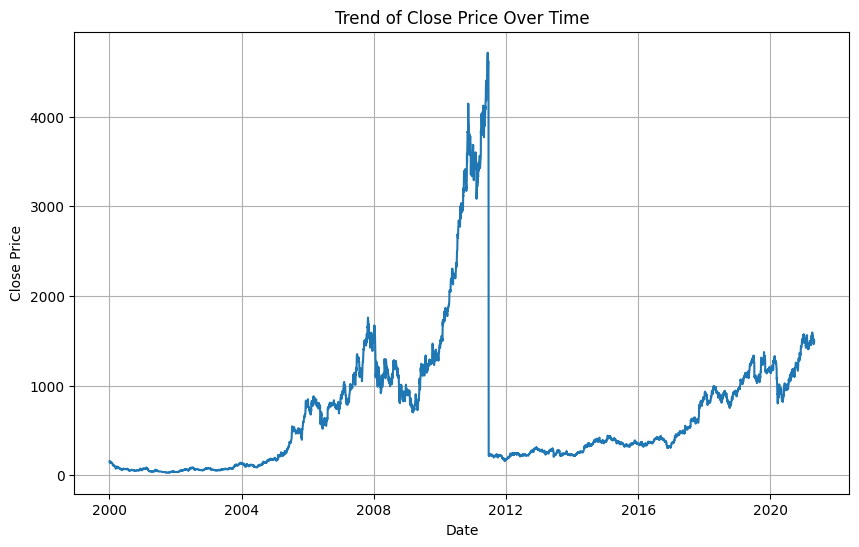

In [11]:
 df['Date'] = pd.to_datetime(df['Date'])
 # Plotting the trend of the 'Close' column
 plt.figure(figsize=(10, 6))
 plt.plot(df['Date'], df['Close'])
 plt.title('Trend of Close Price Over Time')
 plt.xlabel('Date')
 plt.ylabel('Close Price')
 plt.grid(True)
 plt.show()

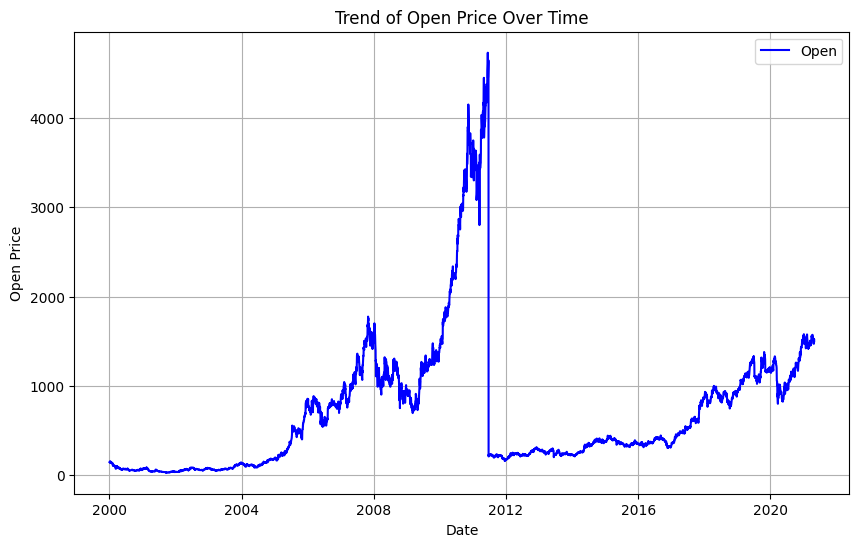

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Open'], color='blue', label='Open')
plt.title('Trend of Open Price Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.grid(True)
plt.legend()
plt.show()

In [14]:
data3 = main_df
data3 = data3.set_index('Date')
data3 = data3[['Open','High','Low','Close','Volume']]

In [16]:
for column in ['Open', 'High', 'Low', 'Close', 'Volume']:
  data3[column+'_ma2'] = data3[column].expanding(min_periods=3).mean()

In [17]:
data3.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Open_ma2      2
High_ma2      2
Low_ma2       2
Close_ma2     2
Volume_ma2    2
dtype: int64

In [18]:
data3['EMA'] = data3.iloc[:,0].ewm(span=3,adjust=False).mean()

In [19]:
data3.head()

,Open,High,Low,Close,Volume,Open_ma2,High_ma2,Low_ma2,Close_ma2,Volume_ma2,EMA
Date,,,,,,,,,,,
2000-01-03,146.0,156.0,146.0,155.0,23000,NaN,NaN,NaN,NaN,NaN,146.000
2000-01-04,152.0,152.0,144.0,147.0,26300,NaN,NaN,NaN,NaN,NaN,149.000
2000-01-05,144.0,148.0,136.0,138.0,20600,147.333333,152.00,142.00,146.666667,23300.0,146.500
2000-01-06,142.0,149.0,141.0,149.0,31600,146.000000,151.25,141.75,147.250000,25375.0,144.250
2000-01-07,149.0,153.0,145.0,146.0,36600,146.600000,151.60,142.40,147.000000,27620.0,146.625


In [20]:
data3.dropna(inplace=True)

In [21]:
target=data3[['Close']]
del data3['Close']

In [22]:
 data3.drop(data3.index[len(data3)-1], axis=0, inplace=True) #Drop the last row in dataset
 target.drop(target.index[len(target)-1], axis=0, inplace=True) #Drop the last row in target

<ipython-input-22-313d89570984>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.drop(target.index[len(target)-1], axis=0, inplace=True) #Drop the last row in target


In [23]:
x, y = data3.values, target.values

In [24]:
x.shape

(5303, 10)

In [25]:
y.shape

(5303, 1)

In [26]:
 x_scaled_set = MinMaxScaler() #Use MinMaxScaler function from sklearn.preprocessing library
 y_scaled_set = MinMaxScaler()
 X = x_scaled_set.fit_transform(x) #Fit to data and transform the data array x
 Y = y_scaled_set.fit_transform(y.reshape(-1,1))

In [27]:
 X_train_data=X[0:4000,]
 y_train_data=Y[0:4000,]
 X_test_data=X[4000:4690,]
 y_test_data=Y[4000:4690,]

In [29]:

 X_train_data = X_train_data.reshape((-1,1,2)) #Reshape train dataset to required format
 X_test_data = X_test_data.reshape((-1,1,2)) #Reshape test dataset to required format

In [30]:
 GRU_model = Sequential() #Use Sequential function from keras.model library
 GRU_model.add(GRU(units=512,
 return_sequences=True,
 input_shape=(1, 2))) #Add GRU model with 512 units. Note that return sequences should be true to pass on the sequences. En
 GRU_model.add(Dropout(0.2)) #Add a dropout layer to avoid overfitting.
 GRU_model.add(GRU(units=256)) #Add another GRU layer with 256 units.
 GRU_model.add(Dropout(0.2)) #Add another dropout layer to avoid overfitting.
 GRU_model.add(Dense(1, activation='sigmoid')) #Finally, add a dense layer for getting a fully connected layer.

In [31]:
 GRU_model.compile(loss='mse', optimizer='adam', metrics = ['accuracy'])

In [33]:
# Reshape train and test datasets to required format for GRU model
X_train_data = X_train_data.reshape((-1, 1, 10))  # Reshape train dataset to required format
X_test_data = X_test_data.reshape((-1, 1, 10))

In [34]:
 GRU_model = Sequential()  # Use Sequential function from keras.model library
 GRU_model.add(GRU(units=512, return_sequences=True, input_shape=(1, 10)))  # Add GRU model with 512 units. Note that return sequences sh
 GRU_model.add(Dropout(0.2))  # Add a dropout layer to avoid overfitting.
 GRU_model.add(GRU(units=256))  # Add another GRU layer with 256 units.
 GRU_model.add(Dropout(0.2))  # Add another dropout layer to avoid overfitting.
 GRU_model.add(Dense(1, activation='sigmoid'))

In [35]:
GRU_model.compile(optimizer='adam', loss='mean_squared_error')


In [36]:
 history = GRU_model.fit(X_train_data, y_train_data, batch_size=250, epochs=100, validation_split=0.15, verbose=1)

Epoch 1/100
14/14 [==============================] - 13s 210ms/step - loss: 0.1134 - val_loss: 3.5736e-04
Epoch 2/100
14/14 [==============================] - 1s 80ms/step - loss: 0.0408 - val_loss: 5.3798e-04
Epoch 3/100
14/14 [==============================] - 1s 74ms/step - loss: 0.0048 - val_loss: 0.0016
Epoch 4/100
14/14 [==============================] - 1s 74ms/step - loss: 0.0040 - val_loss: 1.0772e-04
Epoch 5/100
14/14 [==============================] - 1s 75ms/step - loss: 0.0021 - val_loss: 8.7522e-05
Epoch 6/100
14/14 [==============================] - 1s 78ms/step - loss: 0.0017 - val_loss: 2.5483e-04
Epoch 7/100
14/14 [==============================] - 1s 83ms/step - loss: 0.0014 - val_loss: 1.2411e-04
Epoch 8/100
14/14 [==============================] - 1s 83ms/step - loss: 0.0012 - val_loss: 1.3731e-04
Epoch 9/100
14/14 [==============================] - 1s 77ms/step - loss: 0.0010 - val_loss: 2.7175e-04
Epoch 10/100
14/14 [==============================] - 1s 77ms/step

22/22 [==============================] - 0s 7ms/step - loss: 3.1521e-04
Score: 0.0003152115677949041
22/22 [==============================] - 1s 7ms/step


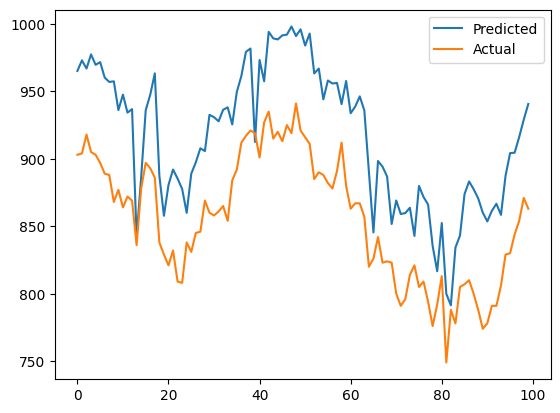

In [37]:
score = GRU_model.evaluate(X_test_data, y_test_data) #Evaluate model can be used to get the loss metric.
print('Score: {}'.format(score))
y_pred = GRU_model.predict(X_test_data) #Apply the built model on test data.
y_test_pred = y_scaled_set.inverse_transform(y_pred) #Use inverse transform to undo the scaling that was done before. This gives us the
y_test_actual = y_scaled_set.inverse_transform(y_test_data) # Apply the inverse transform on the actual dataset for easy comparison of p
plt.plot(y_test_pred[-100:], label='Predicted') #Plot the predicted vs actual graph
plt.plot(y_test_actual[-100:], label='Actual')
plt.legend()
plt.show()